In [32]:
import random
import pandas as pd

In [33]:

dataset = []
df = None

In [34]:
def set_hostnames(number_of_hosts: int) -> list:
    # Define las proporciones de los sistemas operativos
    proportions = {'L': 0.4, 'S': 0.3, 'A': 0.2, 'H': 0.1}

    # Define las proporciones de los entornos
    env_proportions = {'D': 0.1, 'I': 0.1, 'T': 0.25, 'S': 0.25, 'P': 0.3}

    # Define las proporciones de los países
    country_proportions = {'NOR': 0.06, 'FRA': 0.09, 'ITA': 0.16, 'ESP': 0.16, 'DEU': 0.23, 'IRL': 0.3}

    # Genera los hostnames
    hostnames = []
    for i in range(number_of_hosts):
        # Genera el primer caracter
        char1 = pd.Series(proportions).sample(weights=proportions.values()).index[0]

        # Genera el segundo caracter
        char2 = pd.Series(env_proportions).sample(weights=env_proportions.values()).index[0]

        # Genera los tres caracteres siguientes
        country = pd.Series(country_proportions).sample(weights=country_proportions.values()).index[0]
        node = str(random.randint(1, 999)).zfill(3)

        # Concatena los caracteres para formar el hostname
        hostname = char1 + char2 + country + node

        # Añade el hostname a la lista
        hostnames.append(hostname)

    # Devuelve la lista de hostnames
    return hostnames

# Genera 100 hostnames aleatorios
hostnames = set_hostnames(100)

# Crea un DataFrame de Pandas con los hostnames
df = pd.DataFrame({'Hostname': hostnames})

# Muestra los primeros 5 registros del DataFrame
df


,Hostname
0,LPNOR814
1,AIESP671
2,LDDEU852
3,HPITA443
4,LSIRL301
...,...
95,LPIRL347
96,ASESP496
97,LTITA530
98,APNOR428


In [35]:
def get_os(hostname: str) -> str:
    # Asignar el nombre del SO según la primera letra del hostname
    if hostname[0] == 'L':
        return 'Linux'
    elif hostname[0] == 'S':
        return 'Solaris'
    elif hostname[0] == 'A':
        return 'AIX'
    elif hostname[0] == 'H':
        return 'HP-UX'
    else:
        return 'Unknown'

In [36]:
def get_environment(hostname: str) -> str:
    # Asignar el nombre del entorno según la segunda letra del hostname
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknown'

In [37]:
def get_country(hostname: str) -> str:
    # Asignar el nombre del país según las letras de la tercera a la quinta del hostname
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    elif hostname[2:5] == 'FRA':
        return 'France'
    else:
        return 'Unknown'

In [38]:
def set_dataframe(count: int) -> None:
    # Acceder a la variable global df
    global df

    # Llamar a la función set_hostnames
    hostnames = set_hostnames(count)

    # Crear una lista vacía para almacenar los datos
    dataset = []

    # Iterar sobre los hostnames
    for hostname in hostnames:
        # Obtener el nombre del SO, entorno y país
        os = get_os(hostname)
        environment = get_environment(hostname)
        country = get_country(hostname)

        # Obtener el número de nodo
        node = int(hostname[5:8])

        # Crear un diccionario con los datos
        data = {'hostname': hostname, 'os': os, 'environment': environment, 'country': country, 'node': node}

        # Añadir el diccionario a la lista
        dataset.append(data)

    # Crear un DataFrame de Pandas con los datos
    df = pd.DataFrame(dataset)

# Llamar a la función set_dataframe con un parámetro count de 100
set_dataframe(100)

# Mostrar los primeros 5 registros del DataFrame
df


,hostname,os,environment,country,node
0,LSDEU363,Linux,Staging,Germany,363
1,ASIRL229,AIX,Staging,Ireland,229
2,HPIRL346,HP-UX,Production,Ireland,346
3,LSIRL237,Linux,Staging,Ireland,237
4,LDNOR369,Linux,Development,Norway,369
...,...,...,...,...,...
95,LSIRL392,Linux,Staging,Ireland,392
96,LPIRL811,Linux,Production,Ireland,811
97,HIIRL341,HP-UX,Integration,Ireland,341
98,ATIRL514,AIX,Testing,Ireland,514


In [39]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,SDITA881,Solaris,Development,Italy,881
1,LDESP061,Linux,Development,Spain,61
2,STIRL068,Solaris,Testing,Ireland,68
3,SPNOR550,Solaris,Production,Norway,550
4,HPDEU542,HP-UX,Production,Germany,542
...,...,...,...,...,...
1495,STITA687,Solaris,Testing,Italy,687
1496,LPIRL775,Linux,Production,Ireland,775
1497,SPNOR039,Solaris,Production,Norway,39
1498,LPIRL623,Linux,Production,Ireland,623


In [40]:
df.to_csv('hosts.csv', header=True, index=False)

In [41]:
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,SDITA881,Solaris,Development,Italy,881
1,LDESP061,Linux,Development,Spain,61
2,STIRL068,Solaris,Testing,Ireland,68
3,SPNOR550,Solaris,Production,Norway,550
4,HPDEU542,HP-UX,Production,Germany,542
...,...,...,...,...,...
1495,STITA687,Solaris,Testing,Italy,687
1496,LPIRL775,Linux,Production,Ireland,775
1497,SPNOR039,Solaris,Production,Norway,39
1498,LPIRL623,Linux,Production,Ireland,623


<Axes: xlabel='country'>

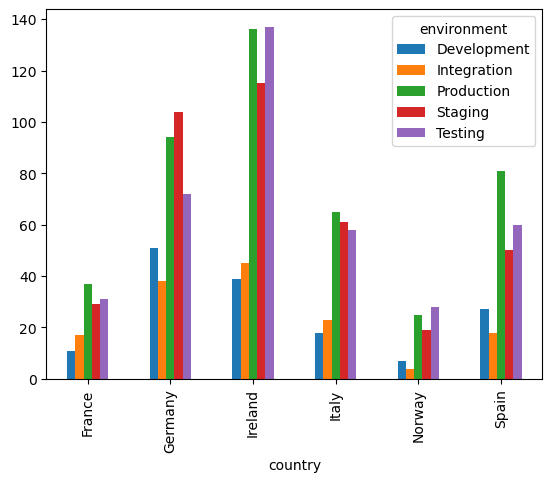

In [42]:
df.groupby(['country', 'environment']).size().unstack().plot(kind='bar')

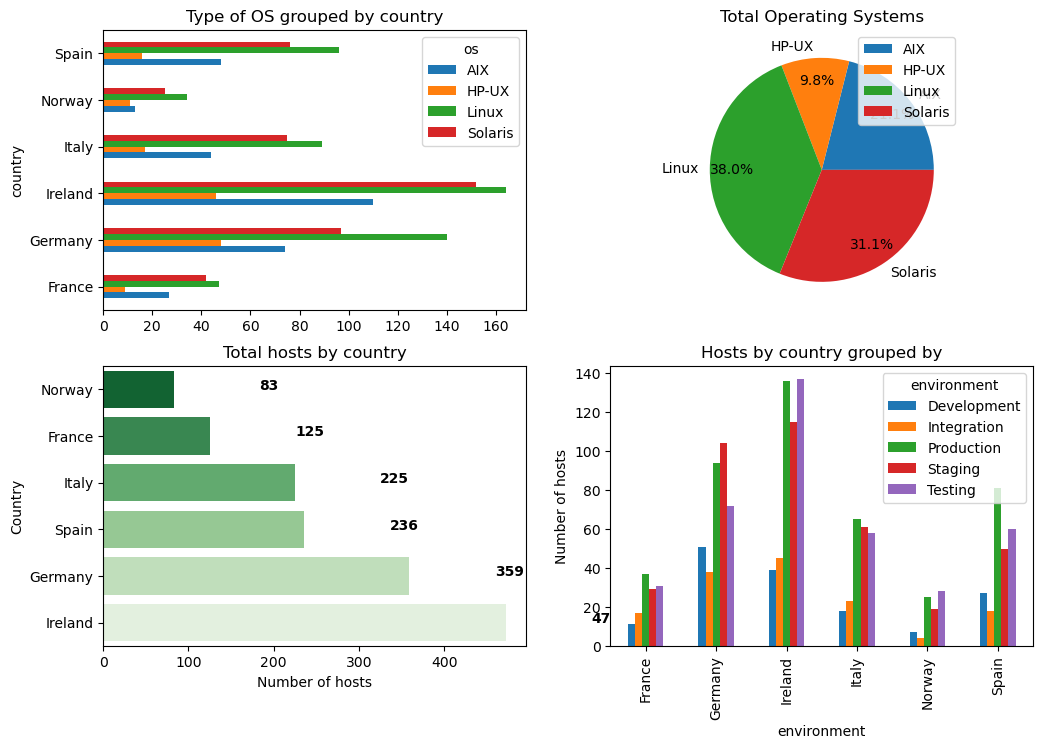

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crea una figura con 4 gráficos en una malla de 2 filas y 2 columnas
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Gráfico 1: Type of OS grouped by country
axs[0, 0].set_title('Type of OS grouped by country')
df.groupby(['country', 'os']).size().unstack().plot(kind='barh', ax=axs[0, 0])


# Gráfico 2: Total Operating Systems
axs[0, 1].set_title('Total Operating Systems')
df.groupby('os').size().plot(kind='pie', ax=axs[0, 1], autopct='%1.1f%%', pctdistance=0.8, legend=True,)

# Gráfico 3: Total hosts by country
axs[1, 0].set_title('Total hosts by country')
vc = df['country'].value_counts().sort_values(ascending=True)
sns.barplot(x=vc.values, y=vc.index, ax=axs[1, 0], palette=sns.color_palette("Greens_r", len(vc)))

for i, v in enumerate(vc.values):
    axs[1, 0].text(v + 100, i, str(v), color='black',fontweight='bold')
    axs[1, 0].set_xlabel('Number of hosts')
# Añadir leyenda al eje y
axs[1, 0].set_ylabel('Country')

# Gráfico 4: Hosts by country grouped by
axs[1, 1].set_title('Hosts by country grouped by')
df.groupby(['country', 'environment']).size().unstack().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_xlabel('environment')
# Añadir leyenda al eje y
axs[1, 1].set_ylabel('Number of hosts')


plt.show()